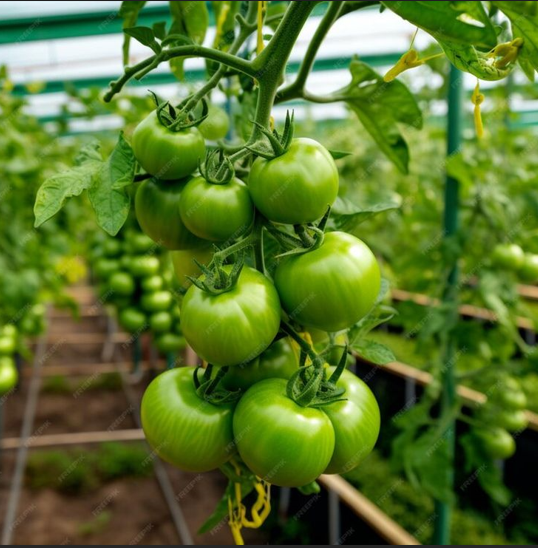

In [5]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
from tensorflow.keras import Sequential
import pathlib
import matplotlib.image as img
import imageio
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
import os

In [34]:
train_path=r'C:\Users\user\Desktop\SHAMBA\DATASET\train'

In [13]:
images_classes = os.listdir('train/')
images_classes

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [9]:
dataset = tf.keras.utils.image_dataset_from_directory(
    'train/',
    batch_size=32,
    image_size=(256, 256),
    seed=123,
    shuffle=True
)

Found 10000 files belonging to 10 classes.


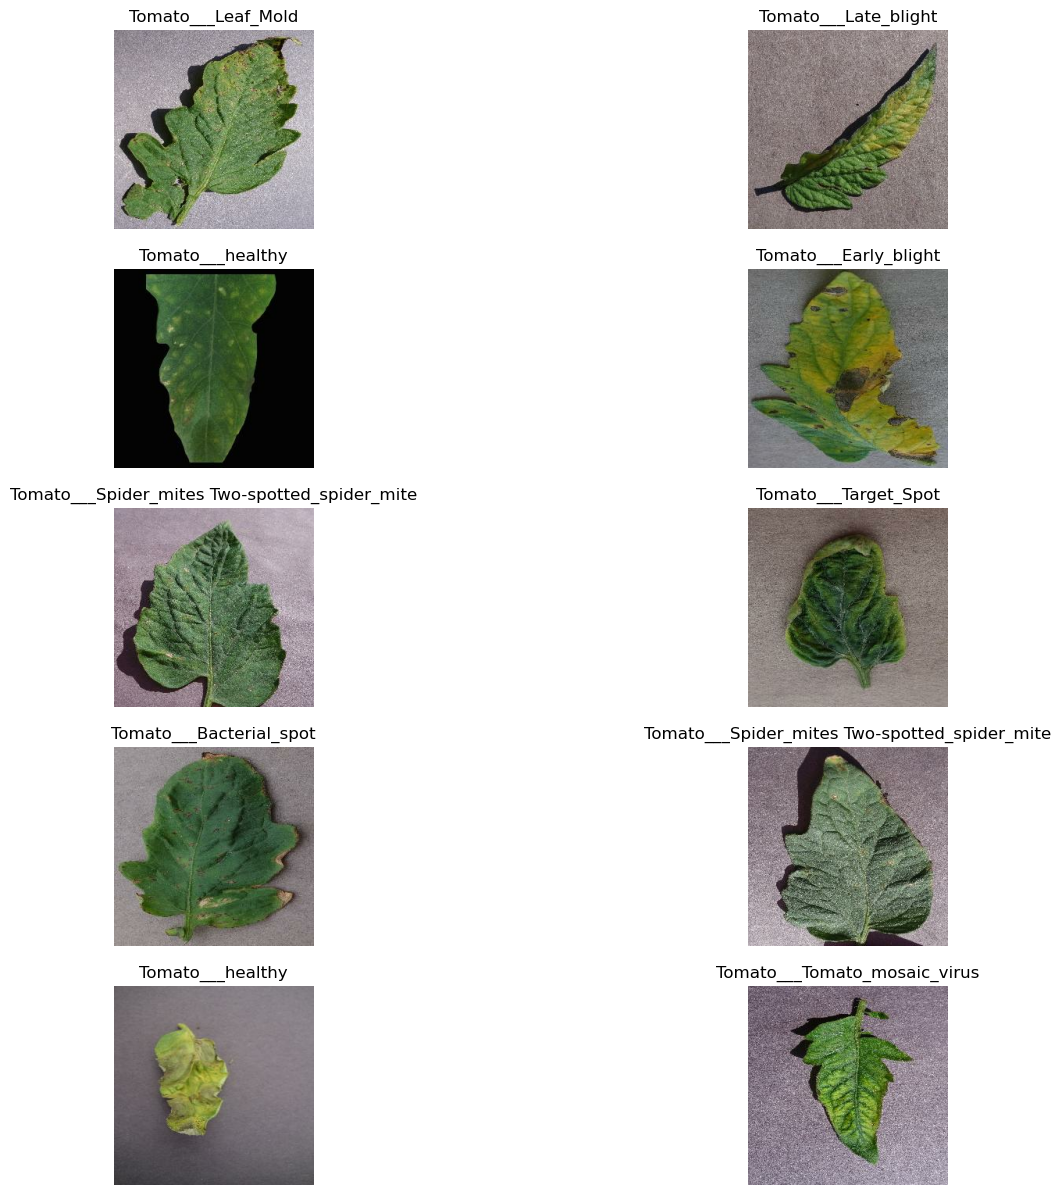

In [17]:
plt.figure(figsize=(15, 15))
for image, lable in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(5, 2, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(images_classes[lable[i].numpy()])
        plt.axis('OFF')

# VISUALIZING THE IMAGES OF THE MODEL 

# Image preprocessing 

In [22]:
data_generator = ImageDataGenerator(rescale=(1/255)) # performing scaling on the pixels of the image 

In [36]:
train_data = data_generator.flow_from_directory(train_path,
                                               target_size = (224, 224),
                                               batch_size = 16)


Found 10000 images belonging to 10 classes.


In [38]:
test_data = data_generator.flow_from_directory(r'C:\Users\user\Desktop\SHAMBA\DATASET\val',
                                              target_size=(224,224),
                                              batch_size= 16)

Found 1000 images belonging to 10 classes.


<!-- MODEL BUILDING  -->

# MODEL BUILDING 

In [42]:
#CNN Model
model = Sequential()
#add Conv layer with filters, kernel, padding, activation, input shape
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [224,224,3])) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D(pool_size = (2,2)))

#add batch normalization layer
#model.add(BatchNormalization())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction
#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())

#add batch normalization layer
#model.add(BatchNormalization())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())
# add dropout layer
model.add(Dropout(0.2))

#add Flatten layer ---> 1D
model.add(Flatten())

#add Fully Connnected Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#add output layer
model.add(Dense(10, activation = 'softmax')) #10 classes

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,956,234 (49.42 MB)

 Trainable params: 12,956,234 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#compile model
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [50]:
#fit model
model_history = model.fit(train_data,
                         epochs = 6,
                         validation_data = test_data)

Epoch 1/6


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1352s 2s/step - accuracy: 0.4218 - loss: 1.5818 - val_accuracy: 0.7660 - val_loss: 0.7058
Epoch 2/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 6059s 10s/step - accuracy: 0.8142 - loss: 0.5274 - val_accuracy: 0.8320 - val_loss: 0.4883
Epoch 3/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 10517s 17s/step - accuracy: 0.8811 - loss: 0.3501 - val_accuracy: 0.8430 - val_loss: 0.4866
Epoch 4/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 1531s 2s/step - accuracy: 0.9337 - loss: 0.2028 - val_accuracy: 0.8790 - val_loss: 0.3965
Epoch 5/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 1422s 2s/step - accuracy: 0.9472 - loss: 0.1562 - val_accuracy: 0.8300 - val_loss: 0.6937
Epoch 6/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 1420s 2s/step - accuracy: 0.9697 - loss: 0.0903 - val_accuracy: 0.8590 - val_loss: 0.5830


# Model Evaluation 

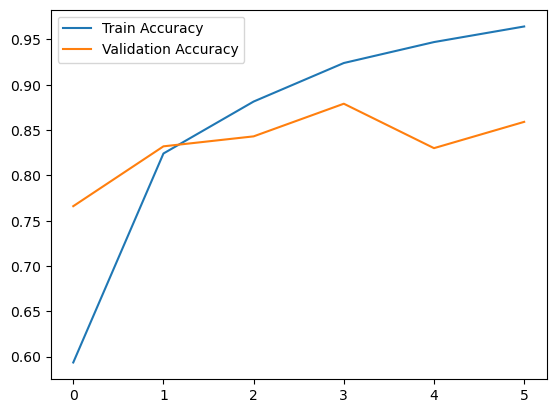

In [53]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

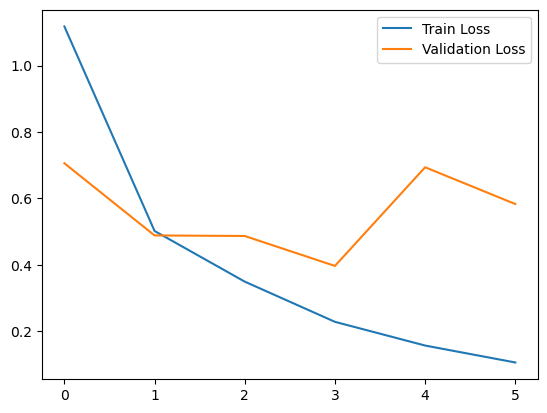

In [55]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [57]:
model.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.8425 - loss: 0.6054


[0.58296138048172, 0.859000027179718]

In [60]:
model.evaluate(train_data)

625/625 ━━━━━━━━━━━━━━━━━━━━ 216s 345ms/step - accuracy: 0.9837 - loss: 0.0503


[0.05345432087779045, 0.9828000068664551]

In [62]:
import joblib as jb

In [66]:
jb.dump(model_history,'diseases_Model.pkl')

['diseases_Model.pkl']